<a href="https://colab.research.google.com/github/yunisindhu/Robusters/blob/master/SindhuRajan_ML1Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning 1 - Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import datasets, linear_model
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [2]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart.csv")

In [3]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Removing NaN Values

In [4]:
count_nan = df['Thal'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 2


In [5]:
df['Thal'] = df['Thal'].replace(np.nan, 0)

In [6]:
count_nan = df['Ca'].isnull().sum()
  
# printing the number of values present
# in the column
print('Number of NaN values present: ' + str(count_nan))

Number of NaN values present: 4


In [7]:
df['Ca'] = df['Ca'].replace(np.nan, 0)

In [8]:
df.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

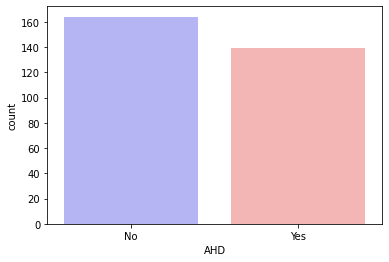

In [9]:
sns.countplot(x="AHD", data=df, palette="bwr")
plt.show()

In [10]:
countNoDisease = len(df[df.AHD == 0])
countHaveDisease = len(df[df.AHD == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.AHD))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.AHD))*100)))

Percentage of Patients Haven't Heart Disease: 0.00%
Percentage of Patients Have Heart Disease: 0.00%


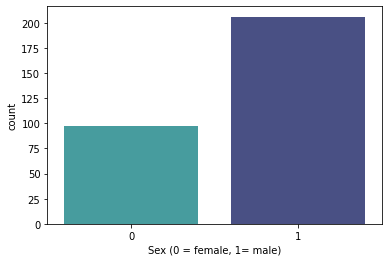

In [11]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [12]:
countFemale = len(df[df.Sex == 0])
countMale = len(df[df.Sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Sex))*100)))

Percentage of Female Patients: 32.01%
Percentage of Male Patients: 67.99%


In [13]:
a = pd.get_dummies(df['ChestPain'], prefix = "ChestPain")
b = pd.get_dummies(df['Thal'], prefix = "Thal")
c = pd.get_dummies(df['Slope'], prefix = "Slope")

In [14]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,0,0,0,1,0,1,0,0,0,0,1
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,1,0,0,0,0,0,1,0,0,1,0
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,1,0,0,0,0,0,0,1,0,1,0
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,0,1,0,0,0,0,1,0,0,0,1
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
df = df.drop(columns = ['ChestPain', 'Thal', 'Slope'])
df.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Ca,AHD,AHD_code,ChestPain_code,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_0,Thal_fixed,Thal_normal,Thal_reversable,Slope_1,Slope_2,Slope_3
0,1,63,1,145,233,1,2,150,0,2.3,0.0,0,0,3,0,0,0,1,0,1,0,0,0,0,1
1,2,67,1,160,286,0,2,108,1,1.5,3.0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
2,3,67,1,120,229,0,2,129,1,2.6,2.0,1,1,0,1,0,0,0,0,0,0,1,0,1,0
3,4,37,1,130,250,0,0,187,0,3.5,0.0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
4,5,41,0,130,204,0,2,172,0,1.4,0.0,0,0,2,0,0,1,0,0,0,1,0,1,0,0
